## trash

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [3]:
def gen_data(theta, n):
    top_left = np.random.binomial(1, 1/2, (int(n/2),int(n/2)))
    top_right = np.random.binomial(1, np.cos(theta)/2, (int(n/2),int(n/2)))
    top = np.concatenate((top_left,top_right), axis=1)
    bot = np.concatenate((top_right,top_left), axis=1)
    A = np.float64(np.concatenate((top,bot), axis=0))
    np.fill_diagonal(A,0)
    return A

In [4]:
def gen_fun(sigma, mu, d):
    return np.log(1/np.sqrt(2*np.pi*sigma)) + (-(d-mu)**2)/(2*sigma)

def gen_likelihoods(d):
    likelihoods = []
    p = len(d)
    for q in range(1,p+1):
        mu1 = np.mean(d[0:q])
        mu2 = np.mean(d[q:])
        if q==1:
            s1 = 0
        else:
            s1 = np.var(d[0:q], ddof=1)
        if q==p:
            s2 = 0
        else:
            s2 = np.var(d[q:], ddof=1)
        sigma = ((q-1)*s1 + (p-q-1)*s2)/(p-2)
        likelihood = np.sum([gen_fun(sigma, mu1, x) for x in d[0:q]])\
                     + np.sum([gen_fun(sigma, mu2, x) for x in d[q:]])
        likelihoods.append(likelihood)
    return likelihoods

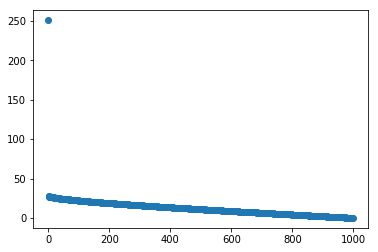

In [16]:
from scipy.sparse.linalg import svds
u,s,vh = svds(data, k=min(data.shape)-1)
plt.scatter(range(len(s)), s[::-1])
plt.show()

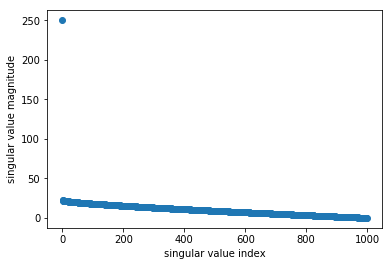

/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


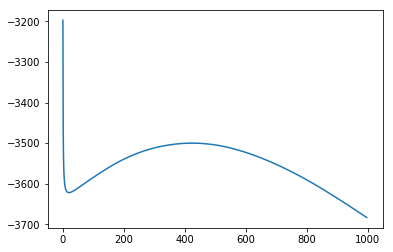

max index:  999
best q:  1000


In [5]:
data = gen_data(np.pi/2, 1000)
pca = PCA()
pca.fit(data)
plt.scatter(range(len(pca.singular_values_)),pca.singular_values_)
plt.ylabel('singular value magnitude')
plt.xlabel('singular value index')
plt.show()
likelihoods = gen_likelihoods(pca.singular_values_)
plt.plot([i for i in likelihoods])
plt.show()
print('max index: ', np.argmax(likelihoods)+1)
print('best q: ', np.argmax(likelihoods)+1+1)

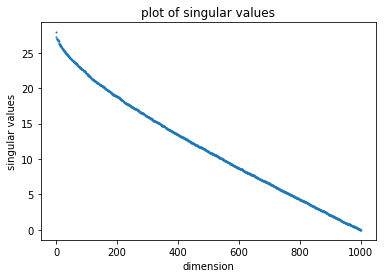

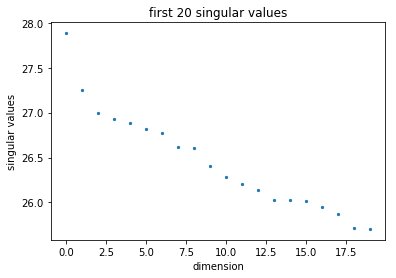

/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bijanvarjavand/Envs/datasci/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


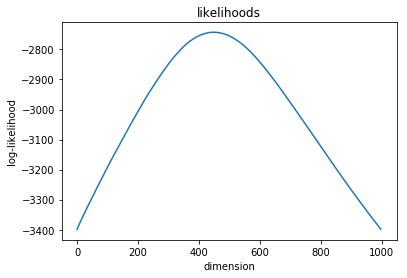

max index:  999
best q:  1000


In [6]:
data = gen_data(0, 1000)
data = data.T * data
#U, S, V = np.linalg.svd(A)
#eigvals = S**2 / np.cumsum(S)[-1]
#eigvals2 = S**2 / np.sum(S)
#assert (eigvals == eigvals2).all()

#fig = plt.figure(figsize=(8,5))
#sing_vals = np.arange(len(eigvals)) + 1
#plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
#plt.title('Scree Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Eigenvalue')
#plt.show()

pca = PCA()
pca.fit(data)
#print(pca.singular_values_)

sing_val = np.cumsum(pca.singular_values_)/np.sum(pca.singular_values_)
plt.scatter(range(len(pca.singular_values_)),pca.singular_values_, s=1)
plt.title('plot of singular values')
plt.xlabel('dimension')
plt.ylabel('singular values')
#plt.savefig('figPCA11.png')
plt.show()
plt.scatter(range(len(pca.singular_values_[:20])),pca.singular_values_[:20],s=5)
plt.title('first 20 singular values')
plt.xlabel('dimension')
plt.ylabel('singular values')
#plt.savefig('figPCA12.png')
plt.show()
likelihoods = gen_likelihoods(pca.singular_values_)
plt.plot([i for i in likelihoods])
plt.title('likelihoods')
plt.xlabel('dimension')
plt.ylabel('log-likelihood')
#plt.savefig('figLL01.png')
plt.show()
print('max index: ', np.argmax(likelihoods)+1)
print('best q: ', np.argmax(likelihoods)+1+1)

In [19]:
theta_likes = []
for theta in np.linspace(0,np.pi/2,20):
    data = gen_data(theta, 100)
    pca = PCA()
    pca.fit(data)
    theta_likes.append(gen_likelihoods(pca.singular_values_))

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


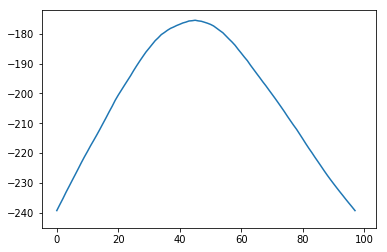

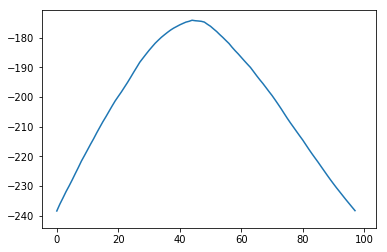

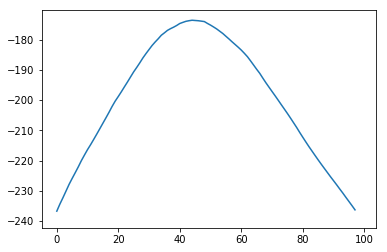

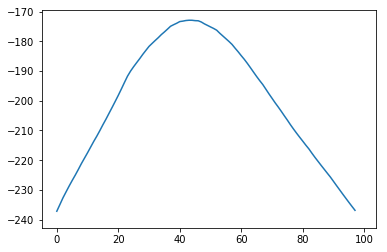

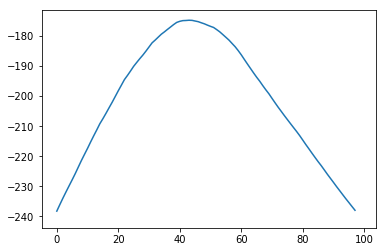

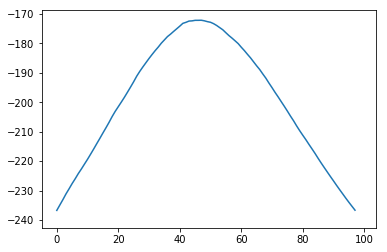

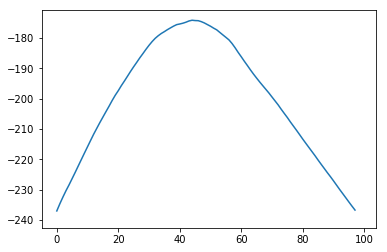

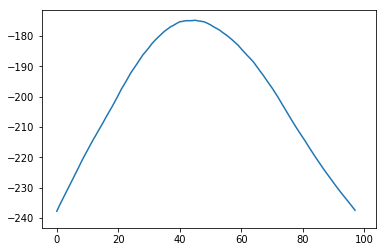

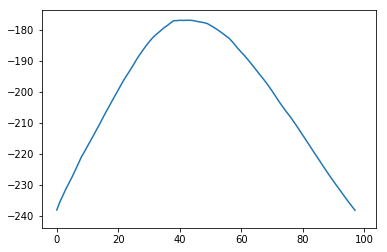

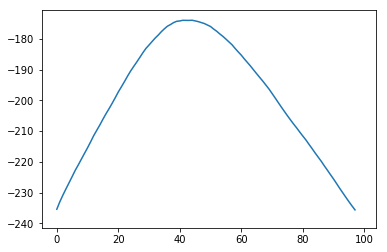

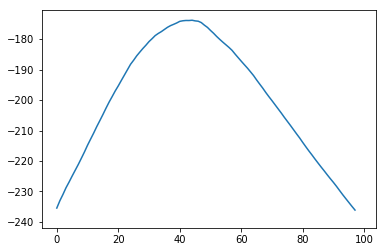

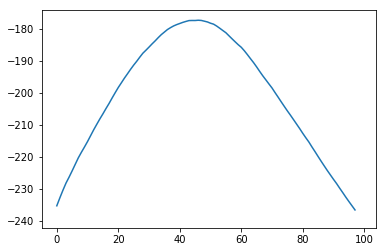

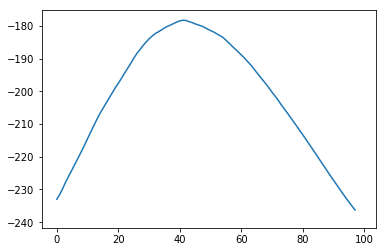

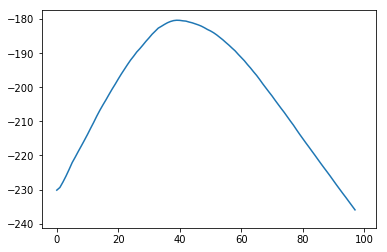

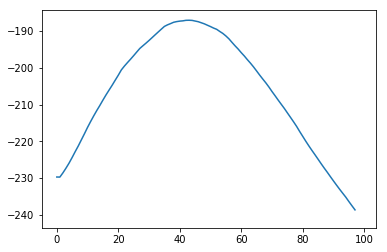

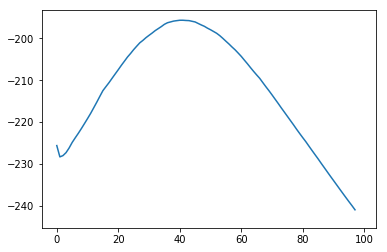

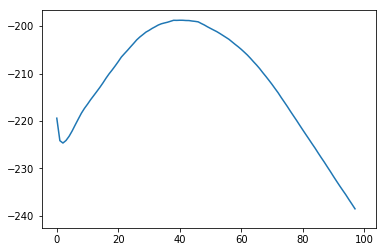

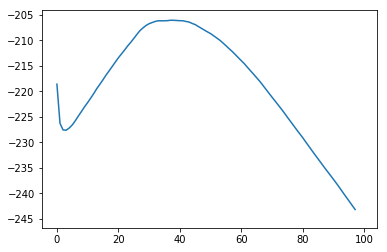

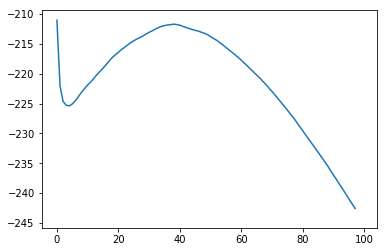

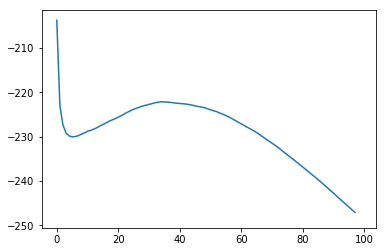

In [20]:
for theta in theta_likes:
    plt.plot(theta)
    plt.show()

In [59]:
import plotly.plotly as py
import plotly.graph_objs as go

traces = []
counter = 0
for theta in np.linspace(0,np.pi/2,50):
    counter += 1
    data = gen_data(theta, 20)
    pca = PCA()
    pca.fit(data)
    theta_likes = gen_likelihoods(pca.singular_values_)
    z_raw = theta_likes
    traces.append(go.Scatter3d(
        x=[counter]*len(theta_likes), y=[i for i,val in enumerate(theta_likes)], z=theta_likes,
        marker=dict(
            size=4,
            color=z,
            colorscale='Viridis',
        ),
        line=dict(
            color='#1f77b4',
            width=1
        ))
    )

data = traces
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
    
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='3d-scatter')

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



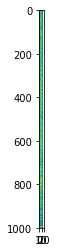

In [68]:
likelihoods = []
for theta in np.linspace(0,np.pi/2,1000):
    counter += 1
    data = gen_data(theta, 20)
    pca = PCA()
    pca.fit(data)
    likelihoods.append(gen_likelihoods(pca.singular_values_))
plt.imshow(likelihoods)

In [69]:

data = [
    go.Surface(
        z=likelihoods
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

In [124]:
likelihoods = likelihood(pca.singular_values_)

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


In [133]:
test = [x for x in range(10)]
print(test)
print(test[0:5])
print(test[5:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]


In [105]:
likelihoods

[-8914.110166384226,
 -9483.944553817868,
 -10039.103850404677,
 -10593.572494176895,
 -11151.550571580043,
 -11791.666556403341,
 -12508.790707411204,
 -13219.592182839004,
 -13949.66356518133,
 -14801.731169538343,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -13976.330575473956,
 -13249.718943537464,
 -12596.290659663442,
 -11968.30522545453,
 -11382.950943845117,
 -10836.647774653136,
 -10285.443275435933,
 -9766.974581070708,
 -9297.021155748771,
 -8876.584871343664,
 nan,
 -8104.098637439907]

In [20]:
Y = gen_data(0, 100)

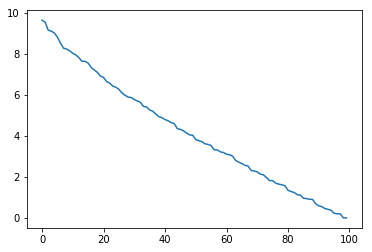

In [22]:
pca2 = PCA()
pca2.fit(Y)
plt.plot(pca2.singular_values_)
plt.show()

In [19]:
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs[:5]:
    print(i[0])

Eigenvalues in descending order:
63.050713730999306
0.48485847112578306
0.48449342742754176
0.47857164370871513
0.4785188762376705


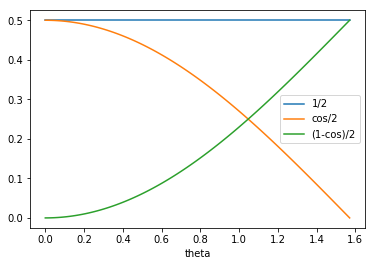

In [20]:
def vars(theta):
    x = 1/2
    y = np.cos(theta)/2
    return x,y

theta = np.linspace(0,np.pi/2,100)

plt.plot(theta,[vars(t)[0] for t in theta])
plt.plot(theta,[vars(t)[1] for t in theta])
plt.plot(theta,[vars(t)[0]-vars(t)[1] for t in theta])
plt.legend(('1/2','cos/2', '(1-cos)/2'))
plt.xlabel('theta')
plt.savefig('theta.png')
plt.show()